In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Carregar o arquivo
df_colesterol = pd.read_csv("./dataset/colesterol.csv")

df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [4]:
df_colesterol.head()

,Id,Grupo Sanguíneo,Fumante,Nível de Atividade,Idade,Peso,Altura,Colesterol
0,1,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,2,A,Não,Moderado,68.0,105.0,184.0,236.98
2,3,O,Não,Alto,25.0,64.8,180.0,161.79
3,4,A,Não,Alto,43.0,120.2,167.0,336.24
4,5,AB,Não,Baixo,79.0,88.5,175.0,226.23


In [5]:
df_colesterol.drop(columns=['Id'],axis=1 , inplace=True)

In [6]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Grupo Sanguíneo     996 non-null    object 
 1   Fumante             997 non-null    object 
 2   Nível de Atividade  996 non-null    object 
 3   Idade               997 non-null    float64
 4   Peso                997 non-null    float64
 5   Altura              997 non-null    float64
 6   Colesterol          1000 non-null   float64
dtypes: float64(4), object(3)
memory usage: 54.8+ KB


In [7]:
# Renomear colunas
df_colesterol.columns = [
    "grupo_sanguineo",
    "fumante",
    "nivel_de_atividade_fisica",
    "idade",
    "peso",
    "altura",
    "colesterol"
]

In [8]:
# Copiar DF EDA
df_colesterol_eda = df_colesterol.copy()

In [9]:
# Copiar DF Bucketing
df_colesterol_bucketing = df_colesterol.copy()

## EDA

In [10]:
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_de_atividade_fisica,idade,peso,altura,colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23
5,B,Não,Baixo,68.0,66.8,170.0,185.31
6,A,Sim,Baixo,60.0,117.3,181.0,289.33
7,O,Sim,Moderado,35.0,86.9,174.0,216.48
8,O,Não,Baixo,62.0,81.3,166.0,235.30
9,B,Sim,Alto,44.0,32.7,165.0,97.79


In [11]:
df_colesterol_eda.grupo_sanguineo.unique()

array(['B', 'A', 'O', 'AB', nan], dtype=object)

In [12]:
df_colesterol_eda.grupo_sanguineo.value_counts()

grupo_sanguineo
O     323
AB    268
A     266
B     139
Name: count, dtype: int64

In [13]:
# Detectar esses valoreas ausentes
df_colesterol_eda.isna().sum()

grupo_sanguineo              4
fumante                      3
nivel_de_atividade_fisica    4
idade                        3
peso                         3
altura                       3
colesterol                   0
dtype: int64

In [14]:
# como a quantidade é muito pequena nas categorias categóricas, pode ser preenchido com a moda 
# Vamos olhar para as medidas estatisticas
df_colesterol_eda.describe()

,idade,peso,altura,colesterol
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


In [15]:
# Esse peso minimo muito provavelmente é um erro (já q a idade minima é 20anos)
# Vamos coletar medidas das variaveis categoricas

moda_grupo_sanguineo = df_colesterol_eda.grupo_sanguineo.mode()
moda_fumante = df_colesterol_eda.fumante.mode()
moda_nivel_atividade_fisica = df_colesterol_eda.nivel_de_atividade_fisica.mode()

mediana_idade = df_colesterol_eda.idade.median()
mediana_peso = df_colesterol_eda.peso.median()
mediana_altura = df_colesterol_eda.altura.median()

In [16]:
# Preencher valores

df_colesterol_eda.fillna(value={
    'grupo_sanguineo': moda_grupo_sanguineo[0],
    'nivel_de_atividade_fisica': moda_nivel_atividade_fisica[0],
    'fumante': moda_fumante[0],
    'idade': mediana_idade,
    'peso': mediana_peso,
    'altura': mediana_altura
}, inplace=True)

In [17]:
# Converter idade e altura para inteiro

df_colesterol_eda.idade = df_colesterol_eda.idade.astype(int)
df_colesterol_eda.altura = df_colesterol_eda.altura.astype(int)


In [18]:
# Estrutura do DF
df_colesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   grupo_sanguineo            1000 non-null   object 
 1   fumante                    1000 non-null   object 
 2   nivel_de_atividade_fisica  1000 non-null   object 
 3   idade                      1000 non-null   int64  
 4   peso                       1000 non-null   float64
 5   altura                     1000 non-null   int64  
 6   colesterol                 1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [19]:
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_de_atividade_fisica,idade,peso,altura,colesterol
0,B,Sim,Baixo,33,85.1,186,199.63
1,A,Não,Moderado,68,105.0,184,236.98
2,O,Não,Alto,25,64.8,180,161.79
3,A,Não,Alto,43,120.2,167,336.24
4,AB,Não,Baixo,79,88.5,175,226.23
5,B,Não,Baixo,68,66.8,170,185.31
6,A,Sim,Baixo,60,117.3,181,289.33
7,O,Sim,Moderado,35,86.9,174,216.48
8,O,Não,Baixo,62,81.3,166,235.30
9,B,Sim,Alto,44,32.7,165,97.79


<Axes: ylabel='peso'>

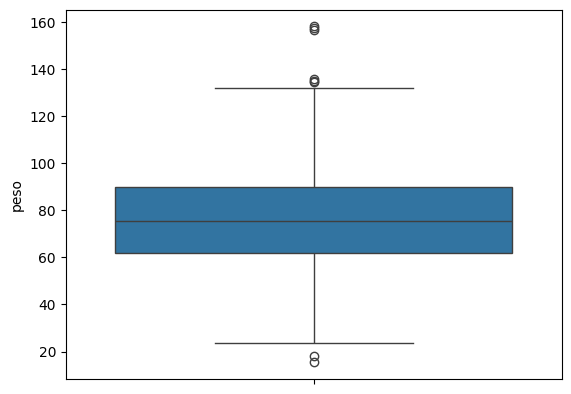

In [20]:
# Verificar / detectar outliers
sns.boxplot(df_colesterol_eda, y = 'peso')

In [21]:
# Filtrar o público a ser removido

df_colesterol_eda[df_colesterol_eda['peso'] < 40].peso.count()

37

In [22]:
# Remover público do DataFrame
df_colesterol_eda.drop(df_colesterol_eda[df_colesterol_eda['peso'] < 40].index, axis=0, inplace=True)

<Axes: ylabel='altura'>

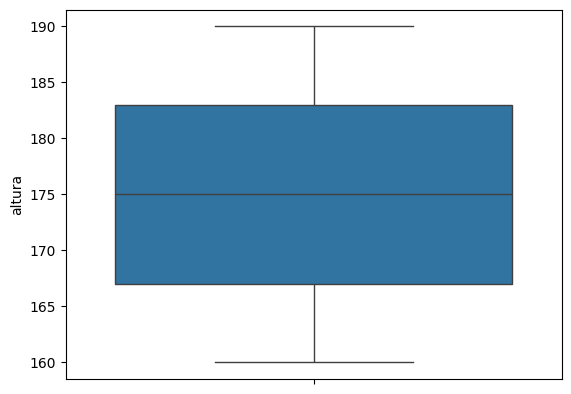

In [23]:
sns.boxplot(df_colesterol_eda, y= 'altura')

<Axes: ylabel='colesterol'>

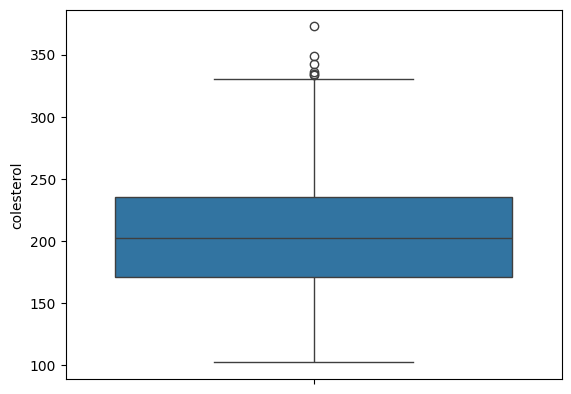

In [24]:
sns.boxplot(df_colesterol_eda, y='colesterol')

<Axes: xlabel='grupo_sanguineo', ylabel='colesterol'>

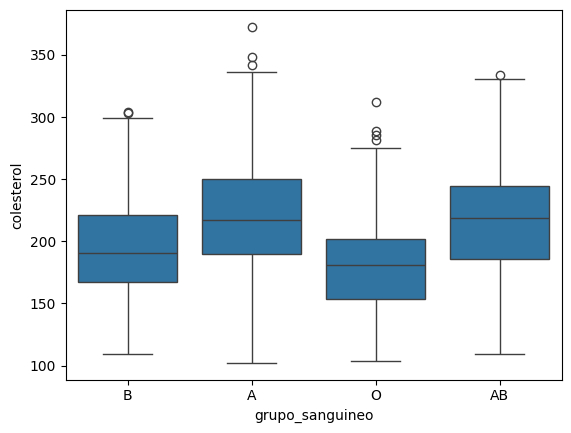

In [25]:
# Cruzamento de variaveis categoricas com nivel colesterol
sns.boxplot(data=df_colesterol_eda, x='grupo_sanguineo', y='colesterol')

<Axes: xlabel='fumante', ylabel='colesterol'>

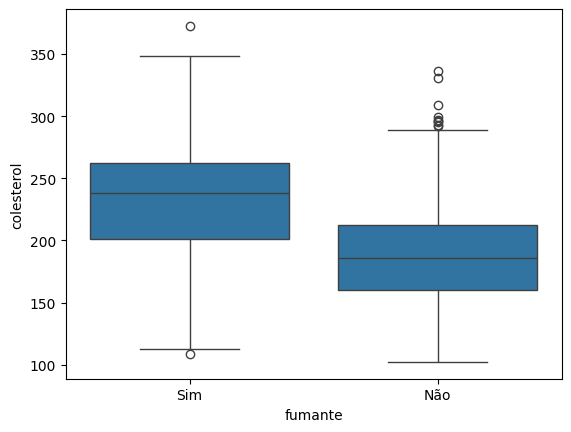

In [26]:
sns.boxplot(data=df_colesterol_eda, x='fumante', y = 'colesterol')

<Axes: xlabel='nivel_de_atividade_fisica', ylabel='colesterol'>

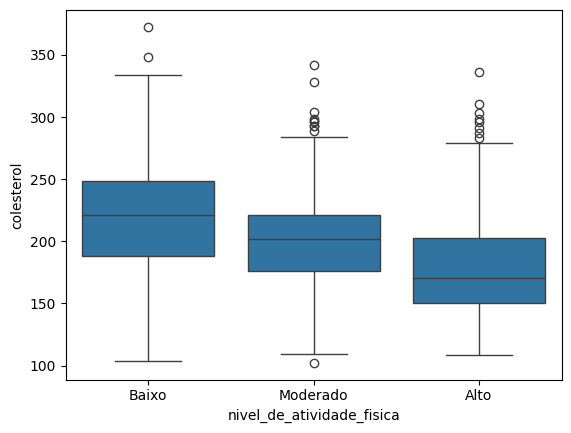

In [27]:
sns.boxplot(data=df_colesterol_eda, x='nivel_de_atividade_fisica', y = 'colesterol')

<Axes: xlabel='idade', ylabel='colesterol'>

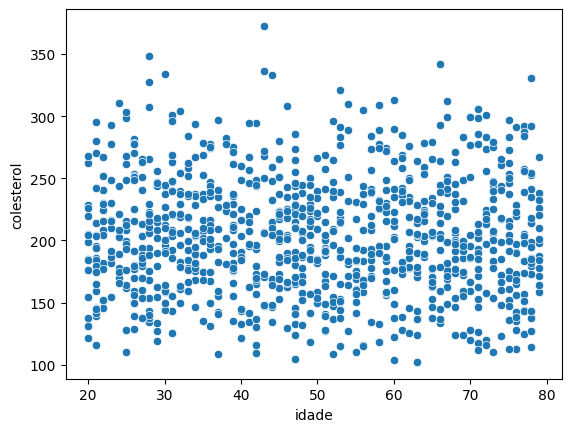

In [28]:
# Cruzamento variáveis numéricas com nível colesterol
sns.scatterplot(data=df_colesterol_eda, x='idade', y='colesterol')

<Axes: xlabel='peso', ylabel='colesterol'>

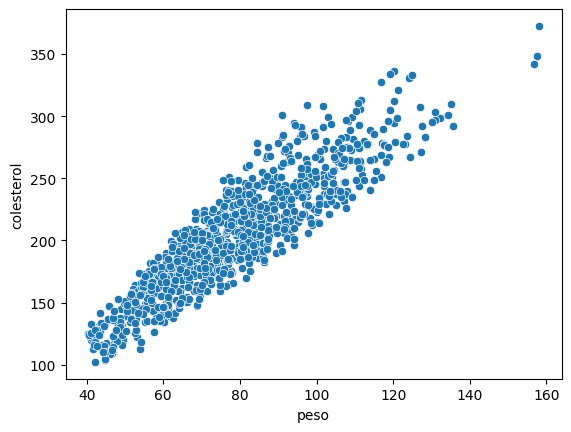

In [29]:
sns.scatterplot(data=df_colesterol_eda, x='peso', y='colesterol')

<Axes: xlabel='altura', ylabel='colesterol'>

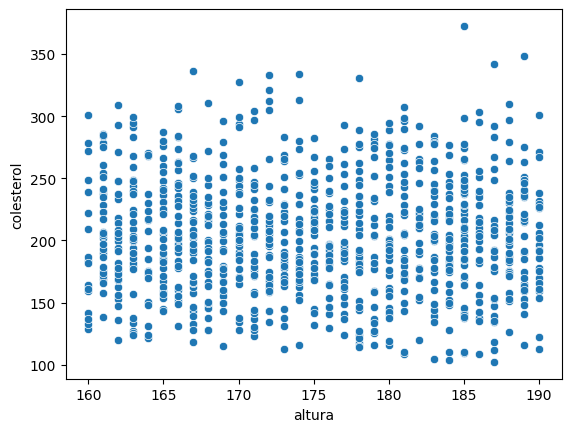

In [30]:
sns.scatterplot(data=df_colesterol_eda, x='altura', y='colesterol')

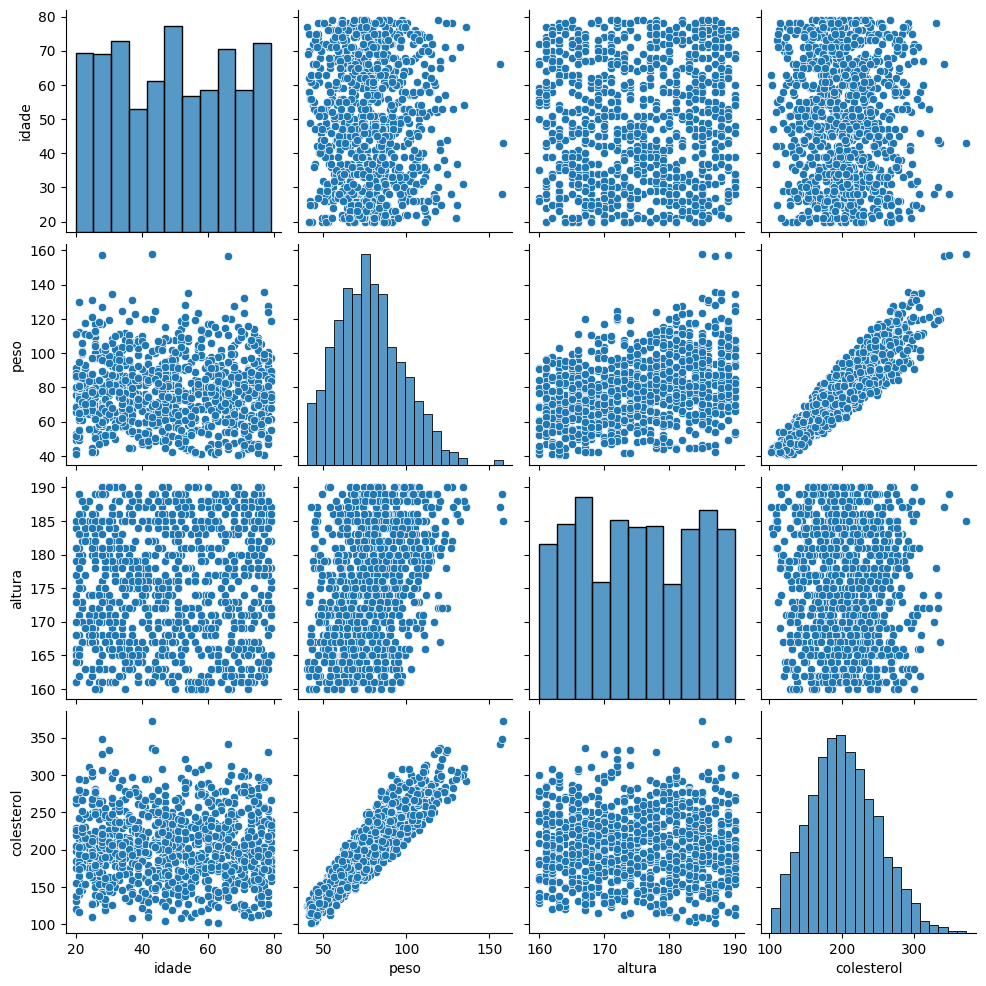

In [31]:
sns.pairplot(df_colesterol_eda)

In [32]:
# Converter variáveis categoricas nominais em numericas, usando One-Hot Encoder do pandas

df_colesterol_eda = pd.get_dummies(df_colesterol_eda, columns=['grupo_sanguineo', 'fumante'], dtype='int64')

In [35]:
df_colesterol_eda.head(10)

,nivel_de_atividade_fisica,idade,peso,altura,colesterol,grupo_sanguineo_A,grupo_sanguineo_AB,grupo_sanguineo_B,grupo_sanguineo_O,fumante_Não,fumante_Sim
0,1,33,85.1,186,199.63,0,0,1,0,0,1
1,2,68,105.0,184,236.98,1,0,0,0,1,0
2,3,25,64.8,180,161.79,0,0,0,1,1,0
3,3,43,120.2,167,336.24,1,0,0,0,1,0
4,1,79,88.5,175,226.23,0,1,0,0,1,0
5,1,68,66.8,170,185.31,0,0,1,0,1,0
6,1,60,117.3,181,289.33,1,0,0,0,0,1
7,2,35,86.9,174,216.48,0,0,0,1,0,1
8,1,62,81.3,166,235.30,0,0,0,1,1,0
10,1,57,123.6,183,283.87,1,0,0,0,0,1


In [34]:
# Converter variavel categorica ordinal em numerica, usando o factorize do Pandas
df_colesterol_eda['nivel_de_atividade_fisica'] = pd.factorize(df_colesterol_eda.nivel_de_atividade_fisica)[0] + 1

<Axes: >

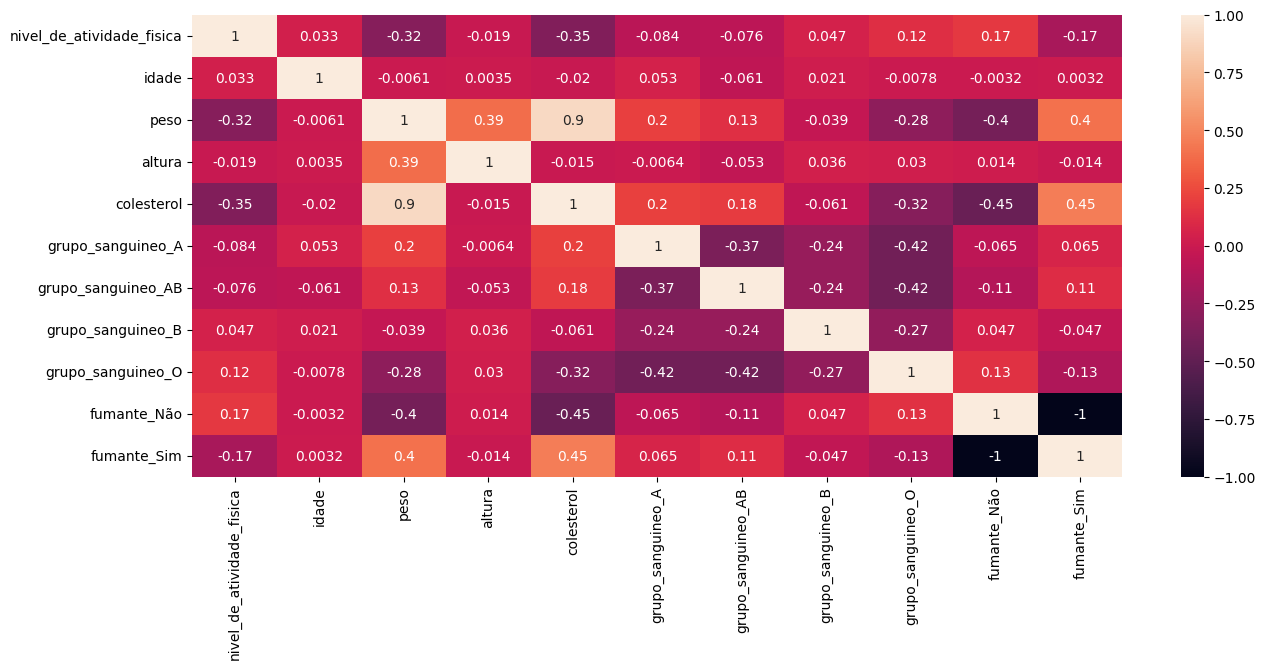

In [37]:
# Mapa de calor com corelação entre variáveis
plt.figure(figsize=(15,6))
sns.heatmap(df_colesterol_eda.corr(), vmin=-1, vmax=1, annot=True)

<Axes: >

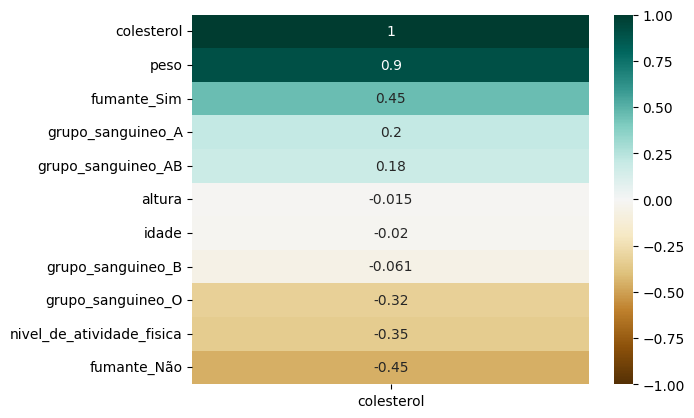

In [38]:
# Formato de ranking, somente correlação com a variável target (colesterol)

sns.heatmap(df_colesterol_eda.corr()[['colesterol']].sort_values(by='colesterol',ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [41]:
# Bucketing Idade
# ex idade: 20 - 79 (podemos analisar com intervalos de valores) nesse exemplo usaremos de 10 em 10

bins_idade = [20,30,40,50,60,70,80]
labels_idade = ['20-29','30-39','40-49','50-59','60-69','70-79']
df_colesterol_bucketing['escala_idade'] = pd.cut(df_colesterol_bucketing['idade'], bins=bins_idade, labels=labels_idade, include_lowest=True)


In [42]:
df_colesterol_bucketing.head()

,grupo_sanguineo,fumante,nivel_de_atividade_fisica,idade,peso,altura,colesterol,escala_idade
0,B,Sim,Baixo,33.0,85.1,186.0,199.63,30-39
1,A,Não,Moderado,68.0,105.0,184.0,236.98,60-69
2,O,Não,Alto,25.0,64.8,180.0,161.79,20-29
3,A,Não,Alto,43.0,120.2,167.0,336.24,40-49
4,AB,Não,Baixo,79.0,88.5,175.0,226.23,70-79


<Axes: xlabel='escala_idade', ylabel='colesterol'>

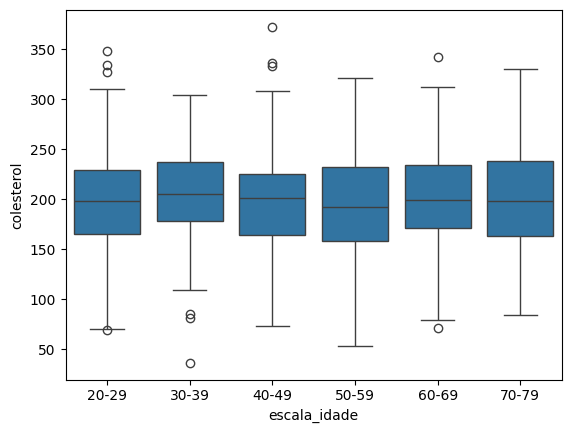

In [43]:
sns.boxplot(df_colesterol_bucketing, x='escala_idade', y='colesterol')

In [44]:
# Bucketing Peso

bins_peso = [40,50,60,70,80,90,100,110,120,130,140,150,160]
labels_peso = ['40-49','50-59','60-69','70-79', '80-89', '90-99', '100-109', '110-119', '120-129','130-139','140-149','150-159']
df_colesterol_bucketing['peso'] = pd.cut(df_colesterol_bucketing['peso'], bins=bins_peso, labels=labels_peso, include_lowest=True)

In [45]:
df_colesterol_bucketing.head()

,grupo_sanguineo,fumante,nivel_de_atividade_fisica,idade,peso,altura,colesterol,escala_idade
0,B,Sim,Baixo,33.0,80-89,186.0,199.63,30-39
1,A,Não,Moderado,68.0,100-109,184.0,236.98,60-69
2,O,Não,Alto,25.0,60-69,180.0,161.79,20-29
3,A,Não,Alto,43.0,120-129,167.0,336.24,40-49
4,AB,Não,Baixo,79.0,80-89,175.0,226.23,70-79


<Axes: xlabel='peso', ylabel='colesterol'>

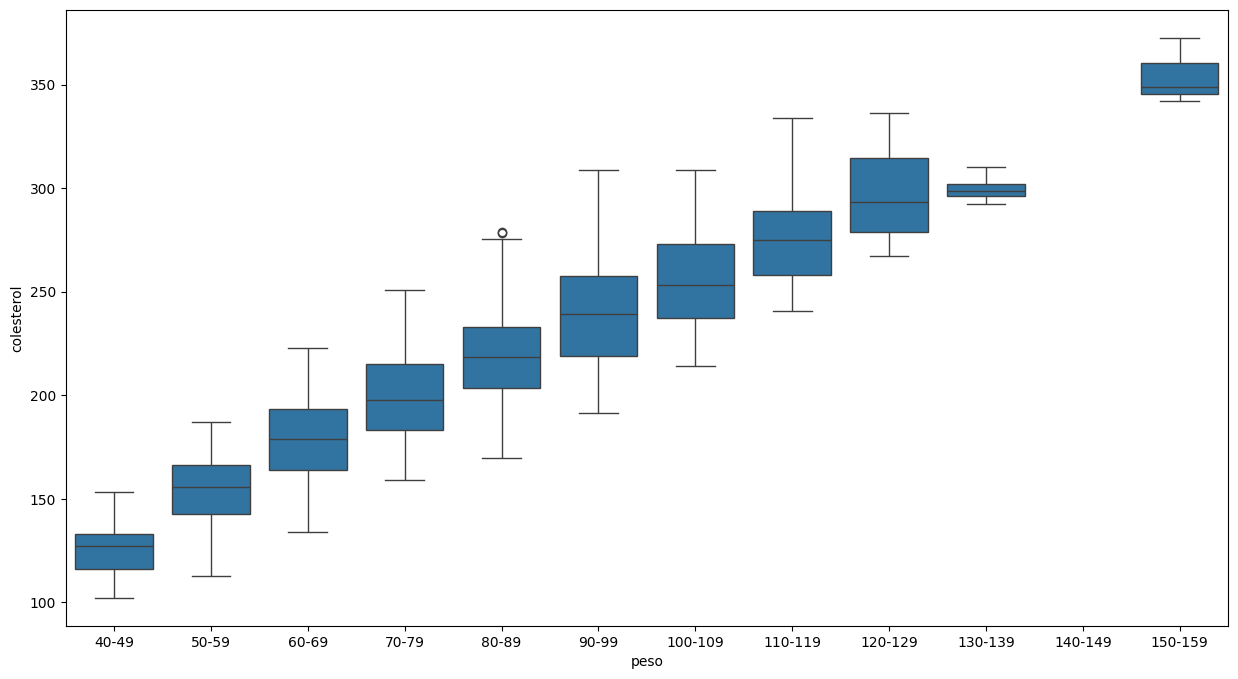

In [47]:
plt.figure(figsize=(15,8))
sns.boxplot(df_colesterol_bucketing, x='peso', y='colesterol')

In [48]:
# Treinamento, importando modulos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [49]:
# Criar dataset de treino e teste
df_colesterol.drop(df_colesterol[df_colesterol['peso'] < 40].index, axis=0, inplace=True)

In [50]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   grupo_sanguineo            960 non-null    object 
 1   fumante                    960 non-null    object 
 2   nivel_de_atividade_fisica  959 non-null    object 
 3   idade                      960 non-null    float64
 4   peso                       960 non-null    float64
 5   altura                     960 non-null    float64
 6   colesterol                 963 non-null    float64
dtypes: float64(4), object(3)
memory usage: 60.2+ KB


In [51]:
X = df_colesterol.drop(columns='colesterol', axis=1)
y = df_colesterol['colesterol']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=51)

In [55]:
X_test.shape

(289, 6)